# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
url = "https://drive.google.com/uc?id=1CBxwOG3ltuxPokby0IeXWkeBeLW3jQI-"

df = pd.read_csv(url)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


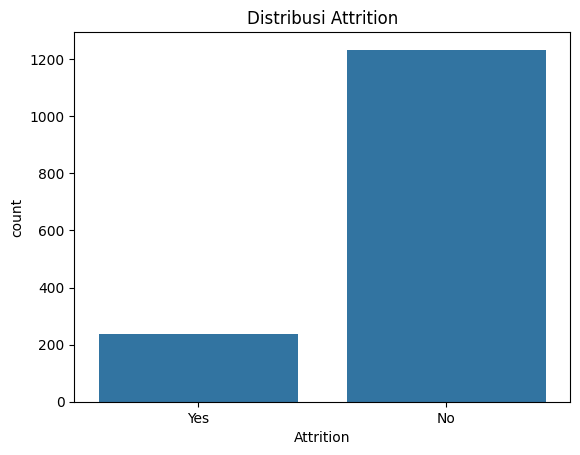

In [6]:
sns.countplot(x='Attrition', data=df)
plt.title("Distribusi Attrition")
plt.show()

In [7]:
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

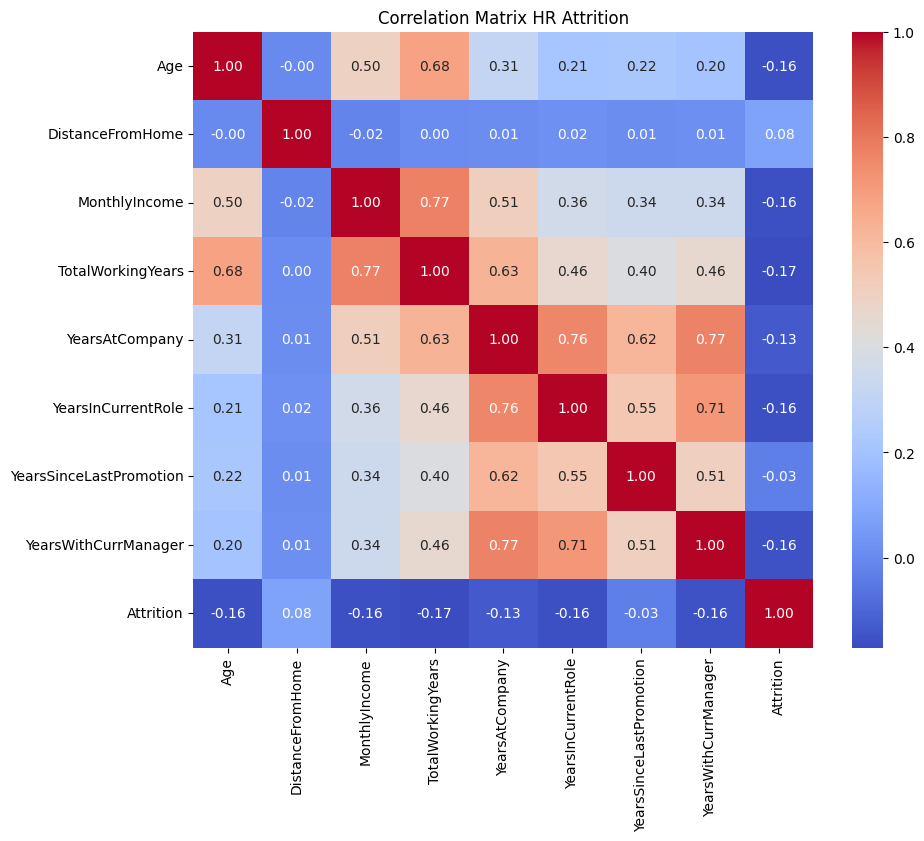

In [8]:
numerical_cols = [
    'Age', 'DistanceFromHome', 'MonthlyIncome',
    'TotalWorkingYears', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager', 'Attrition'
]

corr_matrix = df_corr[numerical_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Matrix HR Attrition")
plt.show()


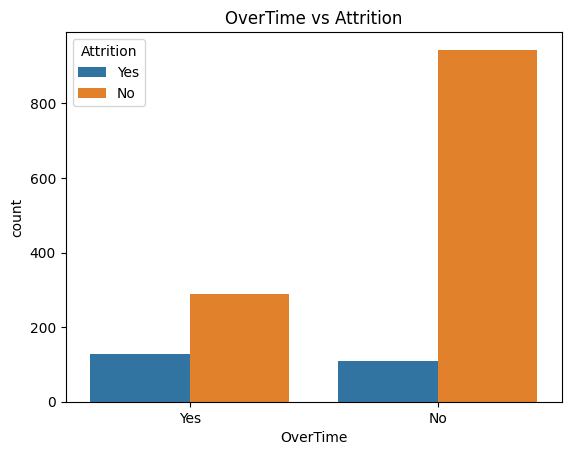

In [9]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("OverTime vs Attrition")
plt.show()

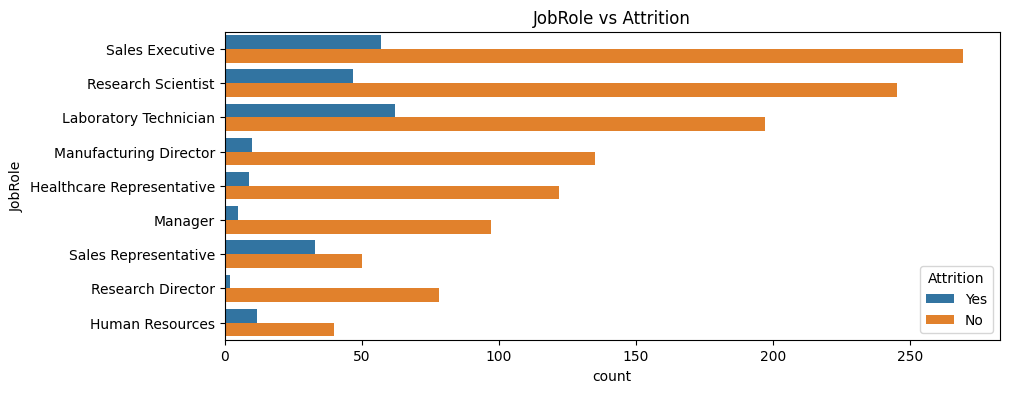

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(y='JobRole', hue='Attrition', data=df)
plt.title("JobRole vs Attrition")
plt.show()

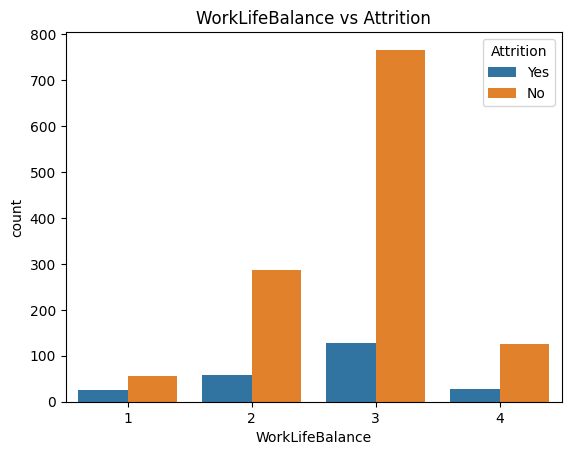

In [11]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title("WorkLifeBalance vs Attrition")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [13]:
dfclean = df.copy()
dfclean.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
dfclean = dfclean.drop(columns=['Over18'])

In [15]:
dfclean = dfclean.drop(columns=['EmployeeCount'])

In [16]:
dfclean = dfclean.drop(columns=['StandardHours'])

In [17]:
dfclean = dfclean.drop(columns=['EmployeeNumber'])

In [18]:
def count_outliers_iqr(dataframe, columns):
    hasil = {}

    for fitur in columns:
        kuartil_bawah = dataframe[fitur].quantile(0.25)
        kuartil_atas = dataframe[fitur].quantile(0.75)
        rentang_iqr = kuartil_atas - kuartil_bawah

        batas_bawah = kuartil_bawah - 1.5 * rentang_iqr
        batas_atas = kuartil_atas + 1.5 * rentang_iqr

        jumlah = dataframe[
            (dataframe[fitur] < batas_bawah) |
            (dataframe[fitur] > batas_atas)
        ].shape[0]

        hasil[fitur] = jumlah

    return pd.DataFrame.from_dict(
        hasil, orient='index', columns=['Jumlah Outlier']
    ).sort_values(by='Jumlah Outlier', ascending=False)

numerical_cols_clean = dfclean.select_dtypes(include=['int64', 'float64']).columns
numerical_cols_clean

outlier_df = count_outliers_iqr(dfclean, numerical_cols_clean)
outlier_df

,Jumlah Outlier
TrainingTimesLastYear,238
PerformanceRating,226
MonthlyIncome,114
YearsSinceLastPromotion,107
YearsAtCompany,104
StockOptionLevel,85
TotalWorkingYears,63
NumCompaniesWorked,52
YearsInCurrentRole,21
YearsWithCurrManager,14


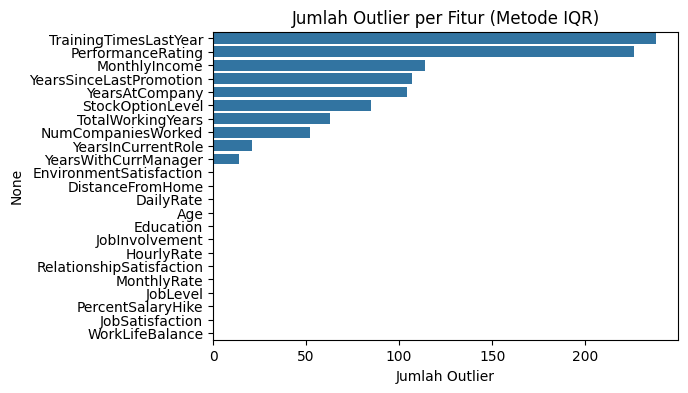

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=outlier_df['Jumlah Outlier'],
    y=outlier_df.index
)
plt.title("Jumlah Outlier per Fitur (Metode IQR)")
plt.show()


In [20]:
# Binning Usia Pegawai
# Pengelompokan usia untuk melihat pola attrition berdasarkan fase karier

age_bins = [17, 25, 35, 45, 60]
age_labels = ['Early Career', 'Mid Career', 'Senior', 'Late Career']

dfclean['AgeGroup'] = pd.cut(
    dfclean['Age'],
    bins=age_bins,
    labels=age_labels
)

# Cek hasil binning
dfclean[['Age', 'AgeGroup']].head()


,Age,AgeGroup
0,41,Senior
1,49,Late Career
2,37,Senior
3,33,Mid Career
4,27,Mid Career


In [21]:
# ENCODE TARGET
dfclean['Attrition'] = dfclean['Attrition'].map({
    'Yes': 1,
    'No': 0
})

In [22]:
X = dfclean.drop(columns=['Attrition'])
y = dfclean['Attrition']

binary_mapping = {
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0
}

binary_cols = ['OverTime', 'Gender']

for col in binary_cols:
    X[col] = X[col].map(binary_mapping)

nominal_cols = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'JobRole',
    'MaritalStatus',
    'AgeGroup'
]

X = pd.get_dummies(
    X,
    columns=nominal_cols,
    drop_first=True
)

print("Shape fitur setelah preprocessing:", X.shape)
X.head()

Shape fitur setelah preprocessing: (1470, 47)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,AgeGroup_Mid Career,AgeGroup_Senior,AgeGroup_Late Career
0,41,1102,1,2,2,0,94,3,2,4,...,False,False,False,True,False,False,True,False,True,False
1,49,279,8,1,3,1,61,2,2,2,...,False,False,True,False,False,True,False,False,False,True
2,37,1373,2,2,4,1,92,2,1,3,...,False,False,False,False,False,False,True,False,True,False
3,33,1392,3,4,4,0,56,3,1,3,...,False,False,True,False,False,True,False,True,False,False
4,27,591,2,1,1,1,40,3,1,2,...,False,False,False,False,False,True,False,True,False,False


In [23]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_features

scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

X_scaled.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,...,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,5.075305e-17,4.350262e-17,7.008755e-17,1.305078e-16,4.350262e-17,1.691768e-16,6.525392e-17,-2.658493e-17,-9.183886e-17,...,-6.114534e-16,9.667248e-17,6.767074e-17,-1.208406e-18,8.700523e-17,-6.042030e-18,-3.021015e-17,9.063045e-17,1.208406e-18,-2.779334e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,...,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-1.736576e+00,-1.010909e+00,-1.868426e+00,-1.575686e+00,-1.224745e+00,-1.766079e+00,-2.432006e+00,-9.614864e-01,-1.567907e+00,...,-4.262300e-01,-1.584178e+00,-9.320144e-01,-1.450167e+00,-2.171982e+00,-2.493820e+00,-1.144294e+00,-1.167687e+00,-6.791457e-01,-1.155935e+00
25%,-7.581700e-01,-8.366616e-01,-8.875151e-01,-8.916883e-01,-6.605307e-01,-1.224745e+00,-8.803615e-01,-1.026167e+00,-9.614864e-01,-6.608532e-01,...,-4.262300e-01,-6.589728e-01,-9.320144e-01,-6.787735e-01,-6.201892e-01,-1.077862e+00,-6.544537e-01,-6.154916e-01,-6.791457e-01,-5.952272e-01
50%,-1.011589e-01,-1.204135e-03,-2.705440e-01,8.504925e-02,2.546249e-01,8.164966e-01,5.355811e-03,3.796721e-01,-5.778755e-02,2.462002e-01,...,-4.262300e-01,2.662326e-01,2.419883e-01,-1.645114e-01,1.557071e-01,3.380962e-01,-3.278933e-01,-3.393937e-01,-3.687153e-01,-3.148735e-01
75%,6.653541e-01,8.788772e-01,5.932157e-01,1.061787e+00,1.169781e+00,8.164966e-01,8.787715e-01,3.796721e-01,8.459113e-01,1.153254e+00,...,-4.262300e-01,1.191438e+00,2.419883e-01,4.783162e-01,1.557071e-01,3.380962e-01,3.252275e-01,7.649976e-01,2.521455e-01,8.065415e-01
max,2.526886e+00,1.726730e+00,2.444129e+00,2.038524e+00,1.169781e+00,8.164966e-01,1.678377e+00,1.785511e+00,2.653309e+00,1.153254e+00,...,2.346151e+00,1.191438e+00,2.589994e+00,3.692454e+00,2.483396e+00,1.754054e+00,5.386914e+00,3.802074e+00,3.977310e+00,3.610079e+00


In [24]:
X[binary_cols].isnull().sum()

,0
OverTime,0
Gender,0


In [25]:
# Fitur & target
X = X.copy()
y = y.copy()


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (1176, 47)
Test shape : (294, 47)


In [26]:
# Ambil kolom numerik dari TRAIN
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features]  = scaler.transform(X_test[numeric_features])

X_train_scaled[numeric_features].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,...,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03
mean,-4.229421e-17,1.359457e-16,-4.682573e-17,8.760944e-17,1.510508e-17,6.042030e-17,-3.776269e-18,2.537653e-16,7.703588e-17,1.601138e-16,...,-5.694613e-16,1.238616e-16,-3.927320e-17,-7.288199e-17,3.625218e-17,-6.948335e-17,-1.586033e-17,5.588878e-17,-9.667248e-17,7.854639e-17
std,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,...,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00
min,-2.070831e+00,-1.747373e+00,-1.022219e+00,-1.855332e+00,-1.577622e+00,-1.221280e+00,-1.743216e+00,-2.469873e+00,-9.862649e-01,-1.548758e+00,...,-4.320650e-01,-1.600151e+00,-9.354054e-01,-1.457385e+00,-2.198092e+00,-2.448641e+00,-1.158801e+00,-1.185905e+00,-6.791650e-01,-1.177687e+00
25%,-7.628207e-01,-8.381548e-01,-8.999145e-01,-8.821517e-01,-6.587098e-01,-1.221280e+00,-8.593318e-01,-1.048155e+00,-9.862649e-01,-6.479968e-01,...,-4.320650e-01,-6.799664e-01,-9.354054e-01,-6.879643e-01,-6.053894e-01,-1.055510e+00,-6.657059e-01,-6.253649e-01,-6.791650e-01,-6.164065e-01
50%,-1.088155e-01,-1.119603e-02,-2.883928e-01,9.102879e-02,2.602021e-01,8.188129e-01,2.455234e-02,3.735637e-01,-7.011362e-02,2.527647e-01,...,-4.320650e-01,2.402183e-01,2.474298e-01,-1.750171e-01,1.909617e-01,3.376211e-01,-3.369760e-01,-3.450946e-01,-3.680244e-01,-3.357661e-01
75%,6.541906e-01,8.799502e-01,5.677376e-01,1.064209e+00,1.179114e+00,8.188129e-01,8.593318e-01,3.735637e-01,8.460377e-01,1.153526e+00,...,-4.320650e-01,1.160403e+00,2.474298e-01,4.661669e-01,1.909617e-01,3.376211e-01,4.848486e-01,7.759863e-01,2.542569e-01,7.867953e-01
max,2.507205e+00,1.732459e+00,2.402303e+00,2.037390e+00,1.179114e+00,8.188129e-01,1.694111e+00,1.795282e+00,2.678340e+00,1.153526e+00,...,2.314467e+00,1.160403e+00,2.613100e+00,3.672087e+00,2.580015e+00,1.730752e+00,4.922701e+00,3.578689e+00,3.987945e+00,3.593199e+00


In [27]:
output_dir = "hr_attrition_preprocessing"
os.makedirs(output_dir, exist_ok=True)

train_df = X_train_scaled.copy()
train_df['Attrition'] = y_train.reset_index(drop=True)

test_df = X_test_scaled.copy()
test_df['Attrition'] = y_test.reset_index(drop=True)

train_df.to_csv(f"{output_dir}/train_processed.csv", index=False)
test_df.to_csv(f"{output_dir}/test_processed.csv", index=False)

print("Preprocessing selesai & file tersimpan.")

Preprocessing selesai & file tersimpan.
